<a href="https://colab.research.google.com/github/matheusapostulo/diabetes-machine-learning/blob/main/Diabetes_Machine_Learning_(without_duplicate_rows).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Data Exploration and Visualization

In [4]:
diabetes_dataframe = pd.read_csv('diabetes3_imbalance.csv')

In [5]:
diabetes_dataframe
# Showing the dataset 

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
diabetes_dataframe.describe()
# Dataset description

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
diabetes_dataframe.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [8]:
## Checking duplicate rows
diabetes_dataframe.duplicated()
diabetes_dataframe.duplicated().sum()

23899

In [9]:
## Checkin non-duplicate rows
(~diabetes_dataframe.duplicated()).sum()

229781

In [10]:
## Droping duplicate rows
diabetes_dataframe.drop_duplicates(inplace=True)

## Triyng to find outliers 

In [11]:
# Function for find outliers at the dataframe. This function shows and returns.
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   if len(outliers) > 0 and ((df.max() + df.min())/2 != 0.5) :
      print(f'{df.name} have {len(outliers)} possibles outlier! Max_valor = {df.max()} | Min_valor = {df.min()}')
      return df.name   

In [12]:
# Testing "find_outliers_IQR" in all dataset columns
# Defining a list for all columns
all_columns = diabetes_dataframe.iloc[:, 1:22]

# Defining a list for all columns that've outliers
all_columns_outliers = []
# Calling the function with all columns
for i in all_columns:
 outlier = find_outliers_IQR(diabetes_dataframe[i])
 if outlier != None:
  all_columns_outliers.append(outlier)
 
all_columns_outliers

BMI have 5638 possibles outlier! Max_valor = 98.0 | Min_valor = 12.0
GenHlth have 12078 possibles outlier! Max_valor = 5.0 | Min_valor = 1.0
MentHlth have 36163 possibles outlier! Max_valor = 30.0 | Min_valor = 0.0
PhysHlth have 34347 possibles outlier! Max_valor = 30.0 | Min_valor = 0.0


['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

In [13]:
# Showing the outliers in graph form
fig = px.box(diabetes_dataframe, y=all_columns_outliers[0])
fig.show()

In [14]:
fig = px.box(diabetes_dataframe, y=all_columns_outliers[1])
fig.show()

In [15]:
diabetes_dataframe['GenHlth'][diabetes_dataframe['GenHlth']>=4].count()

43624

In [16]:
fig = px.box(diabetes_dataframe, y=all_columns_outliers[2])
fig.show()

In [17]:
fig = px.box(diabetes_dataframe, y=all_columns_outliers[3])
fig.show()

In [18]:
diabetes_dataframe.loc[diabetes_dataframe['BMI']>=92]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
19816,2.0,1.0,1.0,1.0,92.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,5.0,30.0,30.0,0.0,1.0,4.0,6.0,1.0
36324,1.0,1.0,0.0,1.0,96.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,4.0,8.0
76317,0.0,1.0,0.0,1.0,92.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,6.0
76353,0.0,0.0,1.0,1.0,95.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,6.0,1.0,0.0,8.0,4.0,1.0
76362,2.0,0.0,1.0,1.0,92.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,5.0,1.0,0.0,0.0,8.0,4.0,3.0
76366,0.0,0.0,1.0,0.0,95.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,5.0,8.0
76370,0.0,0.0,1.0,0.0,98.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,10.0,0.0,0.0,0.0,3.0,4.0,6.0
76371,0.0,1.0,1.0,1.0,95.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,15.0,30.0,1.0,0.0,6.0,4.0,2.0
76373,0.0,0.0,1.0,1.0,95.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,4.0,0.0,0.0,3.0,6.0,8.0
76394,2.0,1.0,1.0,1.0,98.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,8.0,6.0,5.0


In [19]:
diabetes_dataframe['BMI'][diabetes_dataframe['BMI']>=92].count()

52

## Missing values analysis

In [20]:
diabetes_dataframe.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Predictors and Classes

In [52]:
x_diabetes = diabetes_dataframe.iloc[:, 1:22].values

In [53]:
x_diabetes

array([[1., 1., 1., ..., 9., 4., 3.],
       [0., 0., 0., ..., 7., 6., 1.],
       [1., 1., 1., ..., 9., 4., 8.],
       ...,
       [0., 0., 1., ..., 2., 5., 2.],
       [1., 0., 1., ..., 7., 5., 1.],
       [1., 1., 1., ..., 9., 6., 2.]])

In [54]:
y_diabetes = diabetes_dataframe.iloc[:, 0].values

In [55]:
y_diabetes

array([0., 0., 0., ..., 0., 0., 2.])

# Split of bases into training and testing

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_diabetes_training, x_diabetes_test, y_diabetes_training, y_diabetes_test = train_test_split(x_diabetes, y_diabetes, test_size=0.20, random_state=0)

In [58]:
x_diabetes_training.shape #predictors training

(183824, 21)

In [59]:
y_diabetes_training.shape #classes training

(183824,)

In [60]:
x_diabetes_test.shape # predictors test

(45957, 21)

In [61]:
y_diabetes_test.shape # class test

(45957,)

## Save Variables

In [62]:
import pickle

In [63]:
with open('diabetes.pkl', mode = 'wb') as f:
  pickle.dump([x_diabetes_training, y_diabetes_training, x_diabetes_test, y_diabetes_test],f)

# Bayes Algorithm - 73.99%

In [64]:
with open('diabetes.pkl', 'rb') as f:
  x_diabetes_training, y_diabetes_training, x_diabetes_test, y_diabetes_test = pickle.load(f)

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
naive_diabetes = GaussianNB()

In [67]:
naive_diabetes.fit(x_diabetes_training, y_diabetes_training)

GaussianNB()

In [68]:
predictions_diabetes = naive_diabetes.predict(x_diabetes_test)

In [69]:
predictions_diabetes

array([2., 0., 0., ..., 0., 0., 0.])

In [70]:
y_diabetes_test

array([0., 0., 0., ..., 0., 2., 0.])

In [71]:
from sklearn.metrics import accuracy_score, classification_report

In [72]:
accuracy_score(y_diabetes_test, predictions_diabetes)

0.7399743238244446

In [73]:
from yellowbrick.classifier import ConfusionMatrix

0.7399743238244446

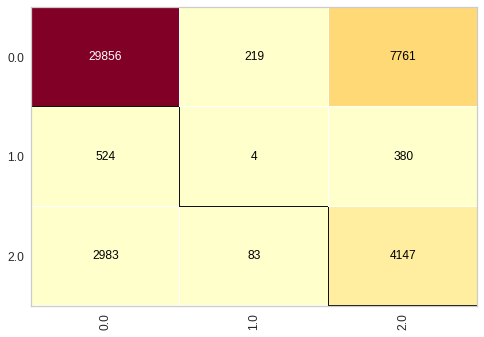

In [74]:
cm = ConfusionMatrix(naive_diabetes)
cm.fit(x_diabetes_training, y_diabetes_training)
cm.score(x_diabetes_test, y_diabetes_test)

In [75]:
print(classification_report(y_diabetes_test, predictions_diabetes))

              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84     37836
         1.0       0.01      0.00      0.01       908
         2.0       0.34      0.57      0.43      7213

    accuracy                           0.74     45957
   macro avg       0.42      0.46      0.42     45957
weighted avg       0.79      0.74      0.76     45957



# Random Forest - 82.11%

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
with open('diabetes.pkl', 'rb') as f:
  x_diabetes_training, y_diabetes_training, x_diabetes_test, y_diabetes_test = pickle.load(f)

In [78]:
random_forest_diabetes = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_diabetes.fit(x_diabetes_training, y_diabetes_training)

RandomForestClassifier(criterion='entropy', random_state=0)

In [79]:
predictions_forest_diabetes = random_forest_diabetes.predict(x_diabetes_test)

In [80]:
predictions_forest_diabetes

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
y_diabetes_test

array([0., 0., 0., ..., 0., 2., 0.])

In [82]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_diabetes_test,predictions_forest_diabetes)

0.8211806688861327